# Exploring Boba tea shops in Denver Metro area
IBM Applied Data Science Capstone Project

## 1.Introduction/Business Problem

Boba tea shops are becoming more popular in the USA these days. They originated in Taiwan in the early 1980s. "Boba", "pearl", or "bubble" refers to chewy tapioca balls that are usually served with tea or milk tea. Both come with a variety of flavors. Boba tea shops are unique and hard to find, unlike coffee shops that you can see at almost every corner of the city. Boba tea tends to be more common and popular in Asian countries, so a city like Denver with a large Asian population will be a good place to invest in a boba tea shop.

Denver is one of the fastest growing cities in the USA. More people are moving to Denver every year. From Denver Post on March 2020, "The population for the city and county of Denver was 727,211 on July 1, the date used as the peg for annual estimates the U.S. Census Bureau is releasing Thursday. Denver, the state’s most populous county, it grew by nearly 11,000 people, or 1.5%, compared to mid-2018. Since 2010, the city’s population has grown by a cumulative 21%, adding more than 127,000 people." So as a resident of this city and a person who is interested in boba tea business, I wonder if someone is looking to open a Boba tea shop in the Denver Metropolitan Area, where would it be the best area to open it? What kind and how popular boba tea shops are in the area? 

This study will be helpful for not only an entrepreneur who wants to invest in a boba tea shop, but also an individual who is interested in the boba tea shop business.


## 2.Data

Firstly, I have to find a data set that include city, latitude, longitude, and city populations in Denver Metropolitan Area. When I say Denver Metropolitan Area, I mean Denver and the cities around Denver with a relatively high population density. In this case, I will refer to "Denver–Aurora–Lakewood, CO Metropolitan Statistical Area" which consists of ten Colorado counties as following: The City and County of Denver, Arapahoe County, Jefferson County, Adams County, Douglas County, the City and County of Broomfield, Elbert County, Park County, Clear Creek County, and Gilpin County.

- The latitude and longitude data will be found on https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=CO.
- For the list of cities in in Denver Metropolitan Area, I will scape it from https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colorado.
- I download city populations data from https://worldpopulationreview.com/states/cities/colorado and upload it back on my github as following https://github.com/kamirothchild/Coursera_Capstone/blob/main/co_city_pop.csv.

Next, I pull the venue data from Foursquare API trying to get a list of boba tea shops that exist in Denver Metropolitan Area. We will use Latitue and Longtitude of Denver as a center of the map and searching for boba tea shops in radius 40 miles or about 65 kilometers. From this part, we can explore the shops and plot it on the map to see their location troughout the areas.

Here is the features we will get:

- venueid
- venuename
- latitude
- longitude
- city
- postalcode
- category_primaryid
- category_primary

Not only venue data, we also can go into venue detail for each boba tea shop to see how they perform via Foursquare API. We pull venue details to see rating, price, and also what are their busy time to determine the best shop hours. We will also use Clustering for this data to see the differences.

Features for boba tea shop detail as following:

- rating
- price
- hours
- hours_popular
- description
- popullarity_score


### Let's get started by importing city in Colorado with lattitude and longitude from CSV
The file can be found: https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=CO.

In [3]:
import numpy as np
import pandas as pd
print('Libraries imported.')

Libraries imported.


In [4]:
url = 'https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&timezone=America/Denver&lang=en&use_labels_for_header=true&csv_separator=%3B'
usa = pd.read_csv(url, sep = ';') #seperate each column with ;
print ('data loaded!')

data loaded!


In [5]:
usa.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,55795,Willow River,MN,46.317812,-92.84315,-6,1,"46.317812,-92.84315"
1,45388,Yorkshire,OH,40.328535,-84.47938,-5,1,"40.328535,-84.47938"
2,39483,Foxworth,MS,31.218509,-89.90761,-6,1,"31.218509,-89.90761"
3,31503,Waycross,GA,31.205194,-82.37534,-5,1,"31.205194,-82.37534"
4,45833,Delphos,OH,40.841409,-84.34178,-5,1,"40.841409,-84.34178"


In [6]:
colorado = usa[usa['State']=="CO"] #filter only colorado
colorado.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
9,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
70,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
230,80809,Cascade,CO,38.911701,-104.987310,-7,1,"38.911701,-104.98731"
252,80123,Littleton,CO,39.616114,-105.073930,-7,1,"39.616114,-105.07393"
253,80217,Denver,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"


In [7]:
colorado.shape #now I have cities in colorado in lat,lng

(680, 8)

### Now, scrape a list of Cities in Denver Metropolitian Area from the website
https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colorado

In [8]:
pip install html-table-parser-python3 #install package to use BeautifulSoup

Note: you may need to restart the kernel to use updated packages.
ERROR: Invalid requirement: '#install'


In [9]:
from urllib.request import Request, urlopen

#scrape website
req = Request('https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colorado', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
webpage

edby="p-cactions-label" />\n\t<h3 id="p-cactions-label">\n\t\t<span>More</span>\n\t</h3>\n\t<div class="vector-menu-content">\n\t\t<ul class="vector-menu-content-list"></ul>\n\t\t\n\t</div>\n</nav>\n\n\t\t\t<div id="p-search" role="search">\n\t<h3 >\n\t\t<label for="searchInput">Search</label>\n\t</h3>\n\t<form action="/w/index.php" id="searchform">\n\t\t<div id="simpleSearch" data-search-loc="header-navigation">\n\t\t\t<input type="search" name="search" placeholder="Search Wikipedia" autocapitalize="sentences" title="Search Wikipedia [f]" accesskey="f" id="searchInput"/>\n\t\t\t<input type="hidden" name="title" value="Special:Search">\n\t\t\t<input type="submit" name="fulltext" value="Search" title="Search Wikipedia for this text" id="mw-searchButton" class="searchButton mw-fallbackSearchButton"/>\n\t\t\t<input type="submit" name="go" value="Go" title="Go to a page with this exact name if it exists" id="searchButton" class="searchButton"/>\n\t\t</div>\n\t</form>\n</div>\n\n\t\t</div>\

In [10]:
#get table html
from bs4 import BeautifulSoup  
soup = BeautifulSoup(webpage, 'html.parser')  
results = soup.find_all('table')
results

ref="/wiki/Fort_Collins,_Colorado" title="Fort Collins, Colorado">Fort Collins</a></li>
 <li><a href="/wiki/Fort_Morgan,_Colorado" title="Fort Morgan, Colorado">Fort Morgan</a></li>
 <li><a href="/wiki/Fountain,_Colorado" title="Fountain, Colorado">Fountain</a></li>
 <li><a href="/wiki/Golden,_Colorado" title="Golden, Colorado">Golden</a></li>
 <li><a href="/wiki/Glenwood_Springs,_Colorado" title="Glenwood Springs, Colorado">Glenwood Springs</a></li>
 <li><a href="/wiki/Grand_Junction,_Colorado" title="Grand Junction, Colorado">Grand Junction</a></li>
 <li><a href="/wiki/Greeley,_Colorado" title="Greeley, Colorado">Greeley</a></li>
 <li><a href="/wiki/Greenwood_Village,_Colorado" title="Greenwood Village, Colorado">Greenwood Village</a></li>
 <li><a href="/wiki/Gunnison,_Colorado" title="Gunnison, Colorado">Gunnison</a></li>
 <li><a href="/wiki/La_Junta,_Colorado" title="La Junta, Colorado">La Junta</a></li>
 <li><a href="/wiki/Lafayette,_Colorado" title="Lafayette, Colorado">Lafayette

In [11]:
#scrape table into columns
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]
K=[]
L=[]
M=[]
N=[]
O=[]
P=[]

for row in soup.find_all('tr'):
    cells=row.find_all('td')
    if len(cells)==16:
        A.append(cells[0].text.strip())
        B.append(cells[1].text.strip())
        C.append(cells[2].text.strip())
        D.append(cells[3].text.strip())
        E.append(cells[4].text.strip())
        F.append(cells[5].text.strip())
        G.append(cells[6].text.strip())
        H.append(cells[7].text.strip())
        I.append(cells[8].text.strip())
        J.append(cells[9].text.strip())
        K.append(cells[10].text.strip())
        L.append(cells[11].text.strip())
        M.append(cells[12].text.strip())
        N.append(cells[13].text.strip())
        O.append(cells[14].text.strip())
        P.append(cells[15].text.strip())

In [12]:
#get dataframe denmetro and choose only columns we want
co_city=pd.DataFrame(A,columns=['City'])
co_city['County']=E


co_city.head()

,City,County
0,Aguilar,Las Animas County
1,Akron,Washington County[9]
2,Alamosa,Alamosa County[9]
3,Alma,Park County
4,Antonito,Conejos County


In [13]:
co_city['County'] = co_city['County'].str.replace("[^a-zA-Z#]", " ") #get rid of special charactors and numbers
co_city.head()

,City,County
0,Aguilar,Las Animas County
1,Akron,Washington County
2,Alamosa,Alamosa County
3,Alma,Park County
4,Antonito,Conejos County


In [14]:
co_city['County'].unique()
co_city.shape

(271, 2)

In [15]:
#define county in denver metro
county_den = ['Denver', 'Arapahoe', 'Jefferson', 'Adams', 'Douglas', 'Broomfield', 'Elbert', 'Park', 'Clear Creek', 'Gilpin']

In [16]:
#get data if co_city['County'] has any text in county_den
metro_city = co_city[co_city['County'].str.contains(r'\b(?:{})\b'.format('|'.join(county_den)))] #bc contains can only be used with str so I join str with | and pass to str.contains
metro_city.head(30)

,City,County
3,Alma,Park County
6,Arvada,Jefferson CountyAdams County
9,Aurora,Arapahoe CountyAdams CountyDouglas County
13,Bennett,Adams CountyArapahoe County
16,Black Hawk,Gilpin County
22,Bow Mar,Arapahoe CountyJefferson County
25,Brighton,Adams County Weld County
27,Broomfield,City and County of Broomfield
35,Castle Pines,Douglas County
36,Castle Rock,Douglas County


In [17]:
metro_city.shape

(45, 2)

In [18]:
print('Number of cities in Denver Metropolitian Area: ', metro_city.shape[0])

Number of cities in Denver Metropolitian Area:  45


### Now, filter colorado data set with just cities in Denver Metropolitian Area

In [19]:
denmetro_latlng = colorado[colorado['City'].isin(list(metro_city['City']))]
denmetro_latlng.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
9,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
70,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
252,80123,Littleton,CO,39.616114,-105.073930,-7,1,"39.616114,-105.07393"
253,80217,Denver,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"
308,80006,Arvada,CO,39.522014,-105.223945,-7,1,"39.522014,-105.223945"


In [20]:
denmetro_latlng.reset_index(drop=True, inplace=True)
denmetro_latlng.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
1,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
2,80123,Littleton,CO,39.616114,-105.073930,-7,1,"39.616114,-105.07393"
3,80217,Denver,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"
4,80006,Arvada,CO,39.522014,-105.223945,-7,1,"39.522014,-105.223945"


In [21]:
denmetro_latlng.drop(['State','Timezone','Daylight savings time flag'], axis=1, inplace=True) #keep only neccesary columns
denmetro_city = denmetro_latlng.drop_duplicates('City')

In [22]:
denmetro_city = denmetro_city.reset_index(drop=True)
denmetro_city #now I have denver metro cities with lat,lng

,Zip,City,Latitude,Longitude,geopoint
0,80126,Littleton,39.544549,-104.968080,"39.544549,-104.96808"
1,80223,Denver,39.699156,-104.999990,"39.699156,-104.99999"
2,80006,Arvada,39.522014,-105.223945,"39.522014,-105.223945"
3,80108,Castle Rock,39.453833,-104.885409,"39.453833,-104.885409"
4,80139,Parker,39.514740,-104.744145,"39.51474,-104.744145"
5,80018,Aurora,39.689244,-104.716600,"39.689244,-104.7166"
6,80030,Westminster,39.830936,-105.037360,"39.830936,-105.03736"
7,80155,Englewood,39.738752,-104.408349,"39.738752,-104.408349"
8,80105,Deer Trail,39.631741,-104.015940,"39.631741,-104.01594"
9,80452,Idaho Springs,39.737369,-105.560540,"39.737369,-105.56054"


In [23]:
print('Number of cities in Denver Metropolitian Area with Latitude and Longtitude', denmetro_city.shape[0])

Number of cities in Denver Metropolitian Area with Latitude and Longtitude 30


### Denver and Metropolitian map

In [24]:
pip install folium

In [25]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium 
from geopy.geocoders import Nominatim 

import matplotlib.cm as cm
import matplotlib.colors as colors
print('imported')

imported


In [27]:
#get Denver latitude and longitude
address = 'Denver'

geolocator = Nominatim(user_agent="denver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver are 39.7392364, -104.9848623.


In [28]:
# create map of Denver using latitude and longitude values
map_den = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(denmetro_city['Latitude'], denmetro_city['Longitude'], denmetro_city['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='coral',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_den)  
    
map_den

### City Populations in Denver Metropolitan Area

I found a population file available on https://worldpopulationreview.com/states/cities/colorado. However, I have a hard time directly pulling or scraping the data from the website. So, I decide to use a simple method by downloading the data and uploading it back on my Githup.

In [29]:
url = 'https://github.com/kamirothchild/Coursera_Capstone/blob/main/co_city_pop.csv?raw=true'
co_pop = pd.read_csv(url)
co_pop.head()

,rank,name,pop2020,pop2010,change,density
0,1,Denver,734134,603354,0.2168,1849.0876
1,2,Colorado Springs,485946,420544,0.1555,962.1798
2,3,Aurora,382742,326073,0.1738,957.9039
3,4,Fort Collins,172862,145267,0.1900,1167.1821
4,5,Lakewood,158660,142786,0.1112,1423.0873


In [30]:
co_pop = co_pop.drop(['pop2010','change','rank'], axis=1)

In [31]:
co_pop.rename(columns = {"name": "City"},  inplace = True) #density per km^2
co_pop.head()

,City,pop2020,density
0,Denver,734134,1849.0876
1,Colorado Springs,485946,962.1798
2,Aurora,382742,957.9039
3,Fort Collins,172862,1167.1821
4,Lakewood,158660,1423.0873


### Boba tea shops in Denver Metropolitan Area from Foursquare

In [32]:
CLIENT_ID = 'D1H4FH12E30Y1JILNCVUWKCE4K1VECBQQS3NXJWVG22EVQ2N' 
CLIENT_SECRET = 'S2BSNE2WKOUGLJH2RACEXC15KTV4JNMZ0JUDHM3JYJ3PPAXA' 
ACCESS_TOKEN = 'DEXTWJB112PSMWQA41OG5HS1DROGB05AIWSDWQDNY5YDVXPG'
VERSION = '20180605' 
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D1H4FH12E30Y1JILNCVUWKCE4K1VECBQQS3NXJWVG22EVQ2N
CLIENT_SECRET:S2BSNE2WKOUGLJH2RACEXC15KTV4JNMZ0JUDHM3JYJ3PPAXA


I am looking for only boba tea shops which Foursqare calls them 'Bubble Tea Shop'. Category ID can be found from https://developer.foursquare.com/docs/build-with-foursquare/categories/. I limit only 100 shops around Denver area with radius of about 40 miles or 65 kilometers.

In [33]:
LIMIT = 100
radius = 65000
categoryId = '52e81612bcbc57f1066b7a0c' #boba tea category
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius,
    categoryId,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=D1H4FH12E30Y1JILNCVUWKCE4K1VECBQQS3NXJWVG22EVQ2N&client_secret=S2BSNE2WKOUGLJH2RACEXC15KTV4JNMZ0JUDHM3JYJ3PPAXA&v=20180605&ll=39.7392364,-104.9848623&radius=65000&categoryId=52e81612bcbc57f1066b7a0c&limit=100'

In [34]:
import requests

In [35]:
results = requests.get(url).json()
results

alInteractionReason'}]},
      'venue': {'id': '5cd60c7b58002c002c82507c',
       'name': 'Spill The Tea',
       'location': {'lat': 39.88469,
        'lng': -104.999026,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.88469,
          'lng': -104.999026}],
        'distance': 16236,
        'postalCode': '80234',
        'cc': 'US',
        'city': 'Northglenn',
        'state': 'CO',
        'country': 'United States',
        'formattedAddress': ['Northglenn, CO 80234', 'United States']},
       'categories': [{'id': '52e81612bcbc57f1066b7a0c',
         'name': 'Bubble Tea Shop',
         'pluralName': 'Bubble Tea Shops',
         'shortName': 'Bubble Tea',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bubble_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-5cd60c7b58002c002c82507c-27'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spo

In [36]:
#function that extracts just category name from venue.categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.location.neighborhood
0,e-0-59593fd4029a55239dca639d-0,0,"[{'summary': 'This spot is popular', 'type': '...",59593fd4029a55239dca639d,Kung Fu Tea,6365 E Hampden Ave #102,39.653983,-104.915901,"[{'label': 'display', 'lat': 39.6539828, 'lng'...",11178,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-4a062ffff964a520cf721fe3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4a062ffff964a520cf721fe3,Lollicup,1589 S Colorado Blvd,39.687811,-104.941935,"[{'label': 'display', 'lat': 39.68781115463941...",6803,...,0,[],at Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e-0-520ad81e498ef116e3fb784d-2,0,"[{'summary': 'This spot is popular', 'type': '...",520ad81e498ef116e3fb784d,Pho Saigon Basil,7057 W Alaska Dr,39.709215,-105.074785,"[{'label': 'display', 'lat': 39.70921479611191...",8393,...,0,[],NaN,2177822,https://www.grubhub.com/restaurant/pho-saigon-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
3,e-0-5a78d07d6fd6264671d65809-3,0,"[{'summary': 'This spot is popular', 'type': '...",5a78d07d6fd6264671d65809,Kung Fu Tea,1121 Broadway Ste 102,40.007786,-105.275285,"[{'label': 'display', 'lat': 40.007786, 'lng':...",38849,...,0,[],NaN,2122308,https://www.grubhub.com/restaurant/kung-fu-tea...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
4,e-0-4ab00cebf964a520a86520e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ab00cebf964a520a86520e3,Ku Cha House of Tea,1141 Pearl St,40.017957,-105.279831,"[{'label': 'display', 'lat': 40.017957, 'lng':...",39970,...,0,[],at Pearl St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city']
nearby_venues =nearby_venues.filter(filtered_columns)
nearby_venues.head()

,venue.id,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.city
0,59593fd4029a55239dca639d,Kung Fu Tea,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",39.653983,-104.915901,Denver
1,4a062ffff964a520cf721fe3,Lollicup,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",39.687811,-104.941935,Denver
2,520ad81e498ef116e3fb784d,Pho Saigon Basil,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",39.709215,-105.074785,Lakewood
3,5a78d07d6fd6264671d65809,Kung Fu Tea,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",40.007786,-105.275285,Boulder
4,4ab00cebf964a520a86520e3,Ku Cha House of Tea,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",40.017957,-105.279831,Boulder


In [39]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng,city
0,59593fd4029a55239dca639d,Kung Fu Tea,Bubble Tea Shop,39.653983,-104.915901,Denver
1,4a062ffff964a520cf721fe3,Lollicup,Tea Room,39.687811,-104.941935,Denver
2,520ad81e498ef116e3fb784d,Pho Saigon Basil,Vietnamese Restaurant,39.709215,-105.074785,Lakewood
3,5a78d07d6fd6264671d65809,Kung Fu Tea,Bubble Tea Shop,40.007786,-105.275285,Boulder
4,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Tea Room,40.017957,-105.279831,Boulder


In [40]:
print('There are ', nearby_venues.shape[0] , ' boba tea shops in Denver Metropolitian Area')

There are  41  boba tea shops in Denver Metropolitian Area


### Now let's plot the map of boba tea shops

In [41]:
# create map of boba tea shops in Denver using latitude and longitude values
map_boba = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#bc473a',
        fill=True,
        fill_color='#bc473a',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boba)  
    
map_boba

From the map, I can see boba tea shops mostly locate in South and North area of Denver

## 3.Methodology

First of all, after I have collected the data including cities in Denver Metropolitan Area with latitude and longitude, city populations, and boba tea shops from Foursquare API, I use python folium library to visualize location of cities in Denver Metropolitan area.

Second step, I start with applying exploratory data analysis to explore and summarize data characteristics. Bar chart is used to compare the different numbers of boba tea shops in Denver Metropolitan area. Scatter plot and correlation coefficient are used to see if there is any linear association between variables.

In the last step, I focus on all 41 boba tea shops in detail. Foursquare API will be used again to pull detail data of each boba tea shop from the list we extract from the first step. After that, we will apply k-means clustering to partition boba tea shops into groups that have similar characteristics.


## 4.Analysis

### Let's start by grouping boba tea shops by cities

In [42]:
boba_by_city = nearby_venues.groupby('city').count().reset_index()
boba_by_city.drop(['categories','lat','lng'], axis=1, inplace=True)
boba_by_city.rename(columns = {"name": "Number of boba tea shops"},  inplace = True)
boba_by_city.rename(columns = {"city": "City"},  inplace = True)
sorted_bobabycity = boba_by_city.sort_values(by='Number of boba tea shops', ascending=False).reset_index(drop=True)
sorted_bobabycity

,City,id,Number of boba tea shops
0,Denver,12,12
1,Aurora,6,6
2,Lakewood,5,5
3,Boulder,3,3
4,Broomfield,3,3
5,Northglenn,2,2
6,Westminster,2,2
7,Centennial,1,1
8,Greenwood Village,1,1
9,Highlands Ranch,1,1


### Let's plot Bar Chart

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid") #use whitegrid as the plot background

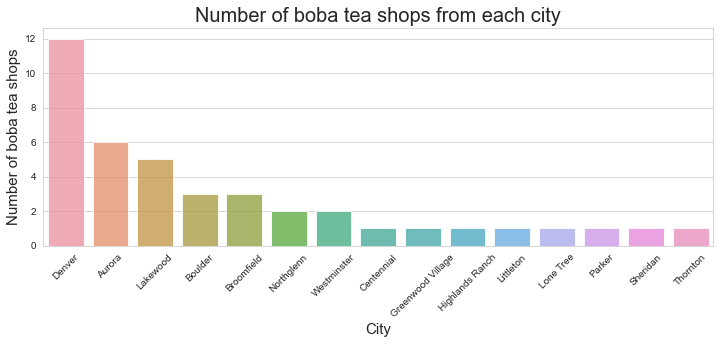

In [44]:
plt.figure(figsize = (12,4))
barplot = sns.barplot(x = "City", y = "Number of boba tea shops", data = sorted_bobabycity, alpha=0.8)
plt.title("Number of boba tea shops from each city", fontsize = 20)
plt.xlabel("City", fontsize = 15)
plt.ylabel("Number of boba tea shops", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

From here, it is obvious that Denver has the most boba tea shops in Denver metro area. My guess is that Denver is a downtown area where people go for entertainment and shopping.

### The City Populations and the Number of Boba Tea Shops

In [45]:
#merge population with numbers of boba tea shops
den_boba=co_pop.merge(sorted_bobabycity, on='City', how='outer')
den_boba.head()

,City,pop2020,density,id,Number of boba tea shops
0,Denver,734134,1849.0876,12.0,12.0
1,Colorado Springs,485946,962.1798,NaN,NaN
2,Aurora,382742,957.9039,6.0,6.0
3,Fort Collins,172862,1167.1821,NaN,NaN
4,Lakewood,158660,1423.0873,5.0,5.0


In [46]:
den_boba['Number of boba tea shops'] = den_boba['Number of boba tea shops'].fillna(0) #replace NaN with 0
den_boba['Number of boba tea shops'] = den_boba['Number of boba tea shops'].astype("int")

In [47]:
den_boba = den_boba[den_boba['City'].isin(list(metro_city['City']))] #filter with list of cities in den metro
den_boba.drop(['id'], axis=1, inplace=True)

In [48]:
den_boba = den_boba.sort_values(by=['Number of boba tea shops','pop2020'], ascending=False).reset_index(drop=True)
#sorted by boba tea shop and population
den_boba

,City,pop2020,density,Number of boba tea shops
0,Denver,734134,1849.0876,12
1,Aurora,382742,957.9039,6
2,Lakewood,158660,1423.0873,5
3,Broomfield,72783,851.4743,3
4,Westminster,113919,1392.5473,2
5,Northglenn,38724,2033.9624,2
6,Thornton,143890,1547.9067,1
7,Centennial,112151,1463.9517,1
8,Parker,58578,1018.9020,1
9,Littleton,50507,1544.5755,1


From the table, you can see there are numbers of cities that have high population but still do not have a boba tea shop.

### Let's plot scatter plot

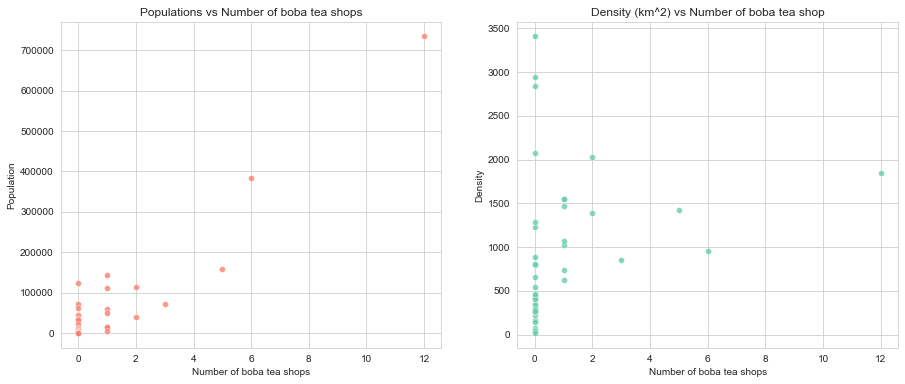

In [49]:
import seaborn as sns
plt.figure(figsize=(15, 6))

y1=den_boba["pop2020"]
x1=den_boba["Number of boba tea shops"]

y2=den_boba["density"]
x2=den_boba["Number of boba tea shops"]

plt.subplot(1, 2, 1)
sns.scatterplot(x1,y1, color='salmon', alpha =0.8)
plt.title("Populations vs Number of boba tea shops")
plt.ylabel("Population")

plt.subplot(1, 2, 2)
sns.scatterplot(x2,y2, color='mediumaquamarine', alpha =0.8)
plt.title("Density (km^2) vs Number of boba tea shop")
plt.ylabel("Density")

plt.show()

From bar chart, I notice that there might be some relationship between number of boba tea shops vs population of each city, and number of bobatea shop vs density of each city. Therefore, I will calculate Correlation coefficient to comfirm the association between variables.

In [50]:
from scipy import stats
den_boba.corr() #get correlation

,pop2020,density,Number of boba tea shops
pop2020,1.000000,0.269480,0.939496
density,0.269480,1.000000,0.253816
Number of boba tea shops,0.939496,0.253816,1.000000


The table shows Correlation coefficient 0.94 between number of boba tea shops and populations. Positive number close to 1 means there is positive relationship between population number and number of boba tea shop.

Surprisingly, it shows Correlation coefficient 0.25 between number of boba tea shops and density of population per square meter. So, there is no significant relationship between these two.

### Detail of Each Boba Tea Shop from Foursquare

In [51]:
venue_id_list = nearby_venues['id'].tolist()
venue_id_list

['59593fd4029a55239dca639d',
 '4a062ffff964a520cf721fe3',
 '520ad81e498ef116e3fb784d',
 '5a78d07d6fd6264671d65809',
 '4ab00cebf964a520a86520e3',
 '4a0b22f5f964a520d3741fe3',
 '51607ec1e4b035abd6942cc6',
 '5f73cad76ded810bb54da299',
 '5fb33314b2af446ec369f512',
 '5929e4c69deb7d7d290d9fa0',
 '5d4647634d90c90008984c0f',
 '556e4ccf498e8a0e49794711',
 '5bba8af3e65d0c0039922ff9',
 '5b284d98237dee0039d0014e',
 '5c0822b39411f2002c046859',
 '5c0486581fa763002c54c5c7',
 '5be607a278782c002c739c45',
 '53fcbebc498ea15f71dc2c08',
 '5f0ba6ec6106cd3252b57674',
 '5c02fa3dba57b4002c2399eb',
 '5ee702a3e3745c0007c69747',
 '5bdf762d6f0aa2002c35a8e1',
 '5f38743d2bd4ed3e83ac7a46',
 '5a21fac41de76502271ba5a1',
 '5bb3ce513ba767002c473645',
 '5d4f2e742d5e6d000862adc4',
 '584aa89f58c4d16a46dd4b88',
 '5cd60c7b58002c002c82507c',
 '5a51648d75eee46709d0df95',
 '5cf9b7bb7564f7002c6e4e63',
 '5823d375a130da5121dd72f7',
 '5f10f6db878b417a064bb3d6',
 '55b9c12c498e909071d6595f',
 '5ca287bce47b46002cc6b8cd',
 '5c391a386eda

In [52]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [53]:
#since we can only pull the detail data of one shops at a time, lets build a loop to pull detail of all the shops

shop_detail=pd.DataFrame() #build empty dataframe to store data
for i in range(len(venue_id_list)):
    venue_id = venue_id_list[i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    results_detail = requests.get(url).json()
    detail = json_normalize(results_detail)
    shop_detail=shop_detail.append(detail)
    
else:
    print("done")

done


In [54]:
shop_detail

,notifications,meta.code,meta.requestId,response.venue.id,response.venue.name,response.venue.contact.phone,response.venue.contact.formattedPhone,response.venue.contact.facebook,response.venue.contact.facebookName,response.venue.location.address,...,response.venue.parent.location.city,response.venue.parent.location.state,response.venue.parent.location.country,response.venue.parent.location.formattedAddress,response.venue.parent.categories,response.venue.parent.closed,response.venue.hierarchy,response.venue.contact.instagram,response.venue.location.neighborhood,response.venue.menu.externalUrl
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6542f26a27360024221f,59593fd4029a55239dca639d,Kung Fu Tea,7203708888,(720) 370-8888,1964236510372177,Kung Fu Tea,6365 E Hampden Ave #102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb65438ed5f550e5b11e4e,4a062ffff964a520cf721fe3,Lollicup,3035046022,(303) 504-6022,NaN,NaN,1589 S Colorado Blvd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6543b1fef738c4e0441f,520ad81e498ef116e3fb784d,Pho Saigon Basil,3039226100,(303) 922-6100,NaN,NaN,7057 W Alaska Dr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6544ee40976c116d0eb4,5a78d07d6fd6264671d65809,Kung Fu Tea,7206383470,(720) 638-3470,112456706110321,Kung Fu Tea,1121 Broadway Ste 102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6544e763db0b99d867a5,4ab00cebf964a520a86520e3,Ku Cha House of Tea,3034433612,(303) 443-3612,NaN,NaN,1141 Pearl St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb65452c123671c320b79d,4a0b22f5f964a520d3741fe3,New Saigon,3039364954,(303) 936-4954,NaN,NaN,630 S Federal Blvd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6545d5239e00e22f7368,51607ec1e4b035abd6942cc6,Saigon Basil,NaN,NaN,NaN,NaN,10665 Melody Dr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6546d98e3a6ad12aac4c,5f73cad76ded810bb54da299,Colorado Tea Station,3032000724,(303) 200-0724,106917874320507,Tea Station Colorado,1700 Platte St # 130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb6546ee40976c116d1768,5fb33314b2af446ec369f512,Boba Chic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5feb65471539512b528d3727,5929e4c69deb7d7d290d9fa0,Bambū,NaN,NaN,NaN,NaN,1149 S Federal Blvd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#filter only columns we are interested
filtered_columns = ['response.venue.id',
                    'response.venue.name',
                    'response.venue.location.city',
                    'response.venue.likes.count','response.venue.rating',
                    'response.venue.description',
                    'response.venue.hours.timeframes',
                    'response.venue.popular.timeframes']
detail_df = shop_detail.filter(filtered_columns)

In [56]:
detail_df.head()

,response.venue.id,response.venue.name,response.venue.location.city,response.venue.likes.count,response.venue.rating,response.venue.description,response.venue.hours.timeframes,response.venue.popular.timeframes
0,59593fd4029a55239dca639d,Kung Fu Tea,Denver,15,8.2,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...","[{'days': 'Today', 'includesToday': True, 'ope..."
0,4a062ffff964a520cf721fe3,Lollicup,Denver,65,9.0,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope..."
0,520ad81e498ef116e3fb784d,Pho Saigon Basil,Lakewood,22,7.9,NaN,NaN,"[{'days': 'Today', 'includesToday': True, 'ope..."
0,5a78d07d6fd6264671d65809,Kung Fu Tea,Boulder,1,7.2,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Fri', 'includesToday': True, 'o...",NaN
0,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Boulder,44,7.4,NaN,"[{'days': 'Mon–Sat', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope..."


In [57]:
#clean up the column names
detail_df.rename(columns = {"response.venue.id": "id"},  inplace = True)
detail_df.rename(columns = {"response.venue.name": "Name"},  inplace = True)
detail_df.rename(columns = {"response.venue.location.city": "City"},  inplace = True)
detail_df.rename(columns = {"response.venue.likes.count": "Like"},  inplace = True)
detail_df.rename(columns = {"response.venue.rating": "Rating"},  inplace = True)
detail_df.rename(columns = {"response.venue.description": "Description"},  inplace = True)
detail_df.rename(columns = {"response.venue.hours.timeframes": "Hours"},  inplace = True)
detail_df.rename(columns = {"response.venue.popular.timeframes": "Popular hours"},  inplace = True)
detail_df.reset_index(inplace=True, drop=True)
detail_df['Like'] = detail_df['Like'].fillna(0) #fill NaN with 0
detail_df['Rating'] = detail_df['Rating'].fillna(0)
detail_df['Like'] = detail_df['Like'].astype(int) #change dat type from str to int fro clustering
detail_df['Rating'] = detail_df['Rating'].astype(int)
detail_df.head()

,id,Name,City,Like,Rating,Description,Hours,Popular hours
0,59593fd4029a55239dca639d,Kung Fu Tea,Denver,15,8,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...","[{'days': 'Today', 'includesToday': True, 'ope..."
1,4a062ffff964a520cf721fe3,Lollicup,Denver,65,9,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope..."
2,520ad81e498ef116e3fb784d,Pho Saigon Basil,Lakewood,22,7,NaN,NaN,"[{'days': 'Today', 'includesToday': True, 'ope..."
3,5a78d07d6fd6264671d65809,Kung Fu Tea,Boulder,1,7,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Fri', 'includesToday': True, 'o...",NaN
4,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Boulder,44,7,NaN,"[{'days': 'Mon–Sat', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope..."


In [58]:
#merge list of shops(contains categories, lat, lng) and shop details
fulldetail_df=detail_df.merge(nearby_venues, on='id', how='outer')
fulldetail_df.drop(['city'], axis=1,inplace=True)
fulldetail_df.head()

,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
0,59593fd4029a55239dca639d,Kung Fu Tea,Denver,15,8,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...","[{'days': 'Today', 'includesToday': True, 'ope...",Kung Fu Tea,Bubble Tea Shop,39.653983,-104.915901
1,4a062ffff964a520cf721fe3,Lollicup,Denver,65,9,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Lollicup,Tea Room,39.687811,-104.941935
2,520ad81e498ef116e3fb784d,Pho Saigon Basil,Lakewood,22,7,NaN,NaN,"[{'days': 'Today', 'includesToday': True, 'ope...",Pho Saigon Basil,Vietnamese Restaurant,39.709215,-105.074785
3,5a78d07d6fd6264671d65809,Kung Fu Tea,Boulder,1,7,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Fri', 'includesToday': True, 'o...",NaN,Kung Fu Tea,Bubble Tea Shop,40.007786,-105.275285
4,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Boulder,44,7,NaN,"[{'days': 'Mon–Sat', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Ku Cha House of Tea,Tea Room,40.017957,-105.279831


### Data Pre-processing for Clustering

We will pick only columns that determine the characteristic of each group: City, Like, Rating, and categories.

Since standard k-means algorithm is not directly applicable to categorical data, we have to transfrom our categorical data into integer data before passing it through the model.


In [59]:
from sklearn import preprocessing
shop_clustering = fulldetail_df.filter(['City','Like','Rating','categories'])
le = preprocessing.LabelEncoder()
shop_clustering = shop_clustering.apply(le.fit_transform)
shop_clustering.head()

,City,Like,Rating,categories
0,4,5,4,0
1,4,11,5,3
2,7,6,3,4
3,1,1,3,0
4,1,10,3,3


Data normalization is also an important step to make sure that the distance calculation has equal weight to each variable. So, we will used StandardScaler() to narmalize the data.

In [60]:
from sklearn.preprocessing import StandardScaler

X = shop_clustering.values[:,1:]
X = np.nan_to_num(X)
cluster_df = StandardScaler().fit_transform(X)
cluster_df

array([[ 0.7686492 ,  2.27225968, -0.49866765],
       [ 2.51946128,  2.97273071,  1.61637101],
       [ 1.06045122,  1.57178865,  2.32138389],
       [-0.39855885,  1.57178865, -0.49866765],
       [ 2.22765927,  1.57178865,  1.61637101],
       [ 2.81126329,  2.27225968,  2.32138389],
       [ 1.93585725,  1.57178865,  2.32138389],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [ 0.47684719, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [ 0.47684719, -0.52962444, -0.49866765],
       [-0.39855885, -0.52962444, -0.49866765],
       [-0.39855885, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.49866765],
       [-0.69036086, -0.52962444, -0.498

### Modeling

In general, we must initialize k or the numbers of cluster at the start but there is a way to find the right k without randomly choosing. Within Cluster Sum Squares (WCSS) is the sum of squares of the distances of each data point in all clusters and its centroids. So, we will calculate WCSS and plot graph between WCSS and k value. And then we select the k number where WCSS begins to flat.

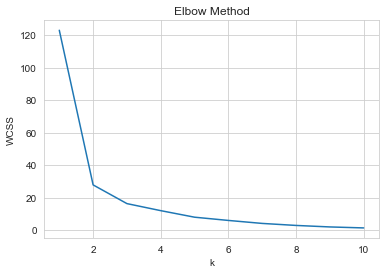

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

From the graph, we can see that afer k = 5, WCSS is minimal. That means the optimal number of clusters for this data set is 5. Now, let's pass normalized data to the model with k = 5.

In [63]:

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=12).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 2, 3, 1, 1, 2, 0, 0, 4])

In [64]:
#fulldetail_df.drop(['Cluster Labels'],axis=1,inplace=True)

In [65]:
fulldetail_df.insert(0, 'Cluster Labels', kmeans.labels_)
fulldetail_df.head()

,Cluster Labels,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
0,3,59593fd4029a55239dca639d,Kung Fu Tea,Denver,15,8,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...","[{'days': 'Today', 'includesToday': True, 'ope...",Kung Fu Tea,Bubble Tea Shop,39.653983,-104.915901
1,1,4a062ffff964a520cf721fe3,Lollicup,Denver,65,9,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Lollicup,Tea Room,39.687811,-104.941935
2,2,520ad81e498ef116e3fb784d,Pho Saigon Basil,Lakewood,22,7,NaN,NaN,"[{'days': 'Today', 'includesToday': True, 'ope...",Pho Saigon Basil,Vietnamese Restaurant,39.709215,-105.074785
3,3,5a78d07d6fd6264671d65809,Kung Fu Tea,Boulder,1,7,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Fri', 'includesToday': True, 'o...",NaN,Kung Fu Tea,Bubble Tea Shop,40.007786,-105.275285
4,1,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Boulder,44,7,NaN,"[{'days': 'Mon–Sat', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Ku Cha House of Tea,Tea Room,40.017957,-105.279831


Let's visualize the clusters.

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(fulldetail_df['lat'], fulldetail_df['lng'], fulldetail_df['City'], fulldetail_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

In [67]:
fulldetail_df.loc[fulldetail_df['Cluster Labels'] == 0]

,Cluster Labels,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
7,0,5f73cad76ded810bb54da299,Colorado Tea Station,Denver,0,0,Refreshing bubble tea and an array of deliciou...,"[{'days': 'Mon–Wed, Sun', 'includesToday': Tru...",NaN,Colorado Tea Station,Bubble Tea Shop,39.758241,-105.006362
8,0,5fb33314b2af446ec369f512,Boba Chic,Denver,0,0,NaN,NaN,NaN,Boba Chic,Bubble Tea Shop,39.704581,-105.025237
10,0,5d4647634d90c90008984c0f,Dingtea,Denver,0,0,NaN,NaN,NaN,Dingtea,Bubble Tea Shop,39.686273,-104.941323
11,0,556e4ccf498e8a0e49794711,Tea Story Boba Milk Tea,Denver,0,0,NaN,"[{'days': 'Mon–Fri', 'includesToday': True, 'o...",NaN,Tea Story Boba Milk Tea,Bubble Tea Shop,39.679466,-104.958855
13,0,5b284d98237dee0039d0014e,tbaar,Denver,1,0,NaN,NaN,NaN,tbaar,Bubble Tea Shop,39.680057,-104.942321
14,0,5c0822b39411f2002c046859,ShareTea,Lakewood,1,0,NaN,NaN,NaN,ShareTea,Bubble Tea Shop,39.708759,-105.076637
15,0,5c0486581fa763002c54c5c7,Share Tea,Lakewood,0,0,NaN,NaN,NaN,Share Tea,Bubble Tea Shop,39.708767,-105.076780
16,0,5be607a278782c002c739c45,Tea 4U,Sheridan,0,0,NaN,NaN,NaN,Tea 4U,Bubble Tea Shop,39.650006,-105.008470
17,0,53fcbebc498ea15f71dc2c08,Birds & Bees Teas,Denver,0,0,NaN,NaN,NaN,Birds & Bees Teas,Bubble Tea Shop,39.678856,-104.893242
18,0,5f0ba6ec6106cd3252b57674,Arden Handcrafted Milk Tea,Lakewood,0,0,NaN,NaN,NaN,Arden Handcrafted Milk Tea,Bubble Tea Shop,39.655010,-105.083680


In [68]:
fulldetail_df.loc[fulldetail_df['Cluster Labels'] == 1]

,Cluster Labels,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
1,1,4a062ffff964a520cf721fe3,Lollicup,Denver,65,9,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Lollicup,Tea Room,39.687811,-104.941935
4,1,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Boulder,44,7,NaN,"[{'days': 'Mon–Sat', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Ku Cha House of Tea,Tea Room,40.017957,-105.279831
5,1,4a0b22f5f964a520d3741fe3,New Saigon,Denver,98,8,NaN,"[{'days': 'Tue–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",New Saigon,Vietnamese Restaurant,39.704848,-105.024811


In [69]:
fulldetail_df.loc[fulldetail_df['Cluster Labels'] == 2]

,Cluster Labels,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
2,2,520ad81e498ef116e3fb784d,Pho Saigon Basil,Lakewood,22,7,NaN,NaN,"[{'days': 'Today', 'includesToday': True, 'ope...",Pho Saigon Basil,Vietnamese Restaurant,39.709215,-105.074785
6,2,51607ec1e4b035abd6942cc6,Saigon Basil,Northglenn,33,7,NaN,NaN,"[{'days': 'Today', 'includesToday': True, 'ope...",Saigon Basil,Vietnamese Restaurant,39.889775,-104.993858
37,2,4b7c42d3f964a52015882fe3,Pho vy,Parker,26,7,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Pho vy,Vietnamese Restaurant,39.536071,-104.775911
39,2,4beef7b5b659a593cbf136c3,Black Pepper Pho,Boulder,22,6,NaN,"[{'days': 'Mon–Sun', 'includesToday': True, 'o...","[{'days': 'Today', 'includesToday': True, 'ope...",Black Pepper Pho,Vietnamese Restaurant,40.021950,-105.259184


In [70]:
fulldetail_df.loc[fulldetail_df['Cluster Labels'] == 3]

,Cluster Labels,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
0,3,59593fd4029a55239dca639d,Kung Fu Tea,Denver,15,8,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...","[{'days': 'Today', 'includesToday': True, 'ope...",Kung Fu Tea,Bubble Tea Shop,39.653983,-104.915901
3,3,5a78d07d6fd6264671d65809,Kung Fu Tea,Boulder,1,7,"Specializes in made-to-order tea, milk & fruit...","[{'days': 'Mon–Fri', 'includesToday': True, 'o...",NaN,Kung Fu Tea,Bubble Tea Shop,40.007786,-105.275285


This is interesting that there is only one brand of boba tea franchise in this cluster. We will take a look closer into this shop to see who they are.

In [78]:
print("So, ", fulldetail_df.loc[0]['Name'], " describes themself as ", fulldetail_df.loc[0]['Description'])

So,  Kung Fu Tea  describes themself as  Specializes in made-to-order tea, milk & fruit-based beverages. Offers a wide selection of drink toppings including bubbles, beans, jellies & pudding.


In [72]:
fulldetail_df.loc[fulldetail_df['Cluster Labels'] == 4]

,Cluster Labels,id,Name,City,Like,Rating,Description,Hours,Popular hours,name,categories,lat,lng
9,4,5929e4c69deb7d7d290d9fa0,Bambū,Denver,5,0,NaN,NaN,NaN,Bambū,Bubble Tea Shop,39.695845,-105.025617
12,4,5bba8af3e65d0c0039922ff9,Beau Tea,Denver,5,0,NaN,"[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...",NaN,Beau Tea,Bubble Tea Shop,39.727428,-104.903869
35,4,5bd4a01275eee4002c30197a,Boba Zone,Littleton,3,0,NaN,NaN,NaN,Boba Zone,Bubble Tea Shop,39.625398,-105.110555
40,4,4a88f37df964a520c20720e3,Great Wall Chinese Buffet Restaurant,Lakewood,28,5,NaN,"[{'days': 'Mon–Thu, Sun', 'includesToday': Tru...","[{'days': 'Today', 'includesToday': True, 'ope...",Great Wall Chinese Buffet Restaurant,Chinese Restaurant,39.657782,-105.082152


In [73]:
cluster_agg = fulldetail_df.groupby(['Cluster Labels','categories']).agg(['mean'])
cluster_agg.drop(['lat','lng'],axis=1,inplace=True)
cluster_agg.reset_index(inplace=True)
cluster_agg


,Cluster Labels,categories,Like,Rating
,,,mean,mean
0,0,Bubble Tea Shop,0.407407,0.00
1,0,Coffee Shop,0.000000,0.00
2,1,Tea Room,54.500000,8.00
3,1,Vietnamese Restaurant,98.000000,8.00
4,2,Vietnamese Restaurant,25.750000,6.75
5,3,Bubble Tea Shop,8.000000,7.50
6,4,Bubble Tea Shop,4.333333,0.00
7,4,Chinese Restaurant,28.000000,5.00


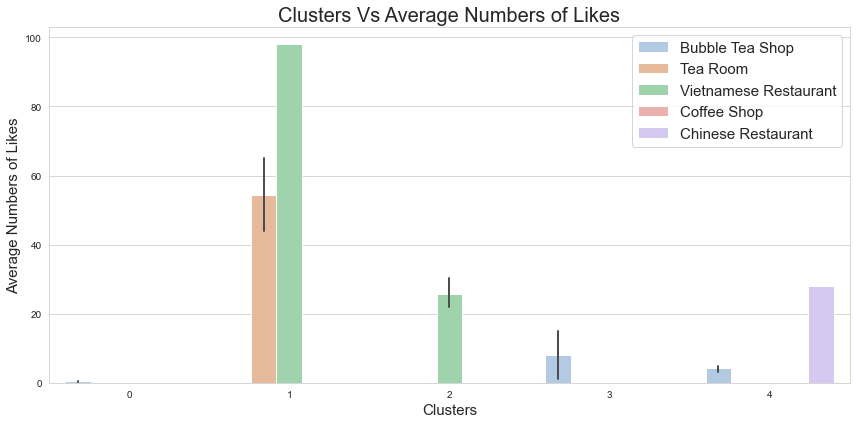

In [74]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Cluster Labels', y = 'Like', hue = 'categories',  data = fulldetail_df, palette = 'pastel', saturation=0.6, errcolor='0.3', errwidth=2)
plt.legend(loc="upper right", fontsize=15) 
plt.title("Clusters Vs Average Numbers of Likes", fontsize = 20)
plt.xlabel("Clusters", fontsize = 15)
plt.ylabel("Average Numbers of Likes", fontsize = 15)
plt.tight_layout()
plt.show()

The bar chart shows that cluster 1: tea rooms and a Vietnamese restaurant have the highest numbers of like among other shops that sell boba teas, followed with a Chinese restaurant in cluster 4, Vietnamese restaurants in cluster 2, and few boba tea shops in cluster 0 only have a few likes.

It is obvious that boba tea shops who specialize and sell only boba teas have less numbers of likes. It is possible that restaurants are easier to gain customers. People need foods but at the same time, they might think that an expensive drink is not necessary for their life.

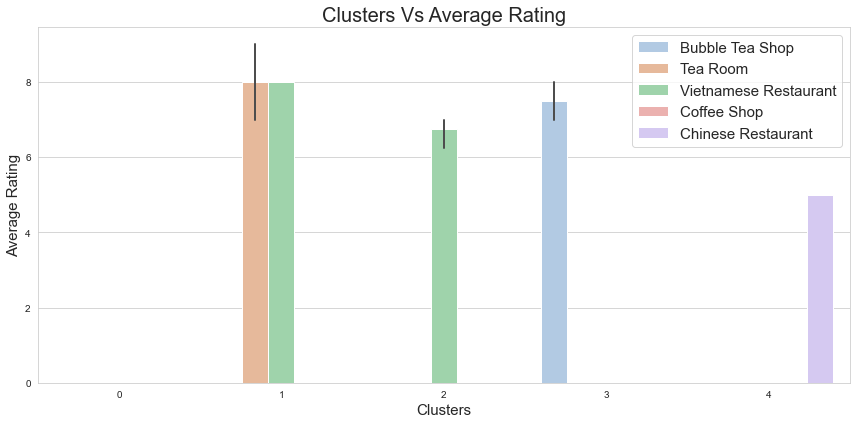

In [75]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Cluster Labels', y = 'Rating', hue = 'categories', data = fulldetail_df, palette = 'pastel', saturation=0.6, errcolor='0.3', errwidth= 2)
plt.title("Clusters Vs Average Rating", fontsize = 20)
plt.xlabel("Clusters", fontsize = 15)
plt.ylabel("Average Rating", fontsize = 15)
plt.legend(loc="upper right", fontsize=15) 
plt.tight_layout()
plt.show()

The bar chart shows that cluster 1: tea rooms and a Vietnamese restaurant have the highest rating, followed by boba tea shops in cluster 3, Vietnamese restaurants in cluster 2, Chinese restaurants in cluster 4, and cluster 0 remains no rating.

## 5.Result and Discussion

The analysis shows that there are only 41 boba tea shops that exist throughout Denver Metropolitan Area in the radius of 40 miles or 65 kilometers from the central of Denver. Since boba teas are not so common in USA like coffee shops, it leads to niche market situation or we can take opportunity to introduce new kind of drink to customers who have not tried it before.

From plotting the map, most of the boba tea shops are located in the north and south part of Denver Metropolitan and Boulder area. The highest density of boba tea shops are in the city of Denver (12 shops), Aurora (6 shops), and Lakewood (5 shops), as we find out that these cities also have the highest populations in Denver Metropolitan area in 2020. Moreover, it has been confirmed with correlation 0.94 that there is significant association between the numbers of boba tea shops and the numbers of populations of each city.

If the investors are looking for unsaturated market, there are many areas that do not have a boba tea shop. For example, Arvada is located northeast of Denver and south of Westminster. The population number is 123,036 in 2020 which is about 18% comparing to Denver. This city will be a good opportunity without a competitor nearby. The following table will show the city population numbers and the numbers of boba tea shops.

In the last part of analysis, all boba tea shops are grouped into 5 clusters by city, number of likes, rating, and category that we pull from Foursquare API. After we examine the features and characteristics of the clusters, it can be said as following:

- Cluster 0 Most Boba tea shops, small amount of likes, located all over the area
- Cluster 1 Well known and high rating tea room and Vietnamese restaurant
- Cluster 2 Well known Vietnamese Restaurant, quite high rating
- Cluster 3 Popular boba tea shops "Kung Fu Tea"
- Cluster 4 Boba tea shops with some likes and a well known Chinese Restaurant

There is an interesting thing we learn from the clusters. Vietnamese and Chinese restaurants are also big competitors to boba tea shops. When people see that these restaurants have a lot of likes and high ratings even just for their foods, the customers will come and the restaurants can have that advantage of selling foods and boba tea altogether. The same as tea shops, they sell all kinds of tea stuff and drink but those people who come for just teas might want to try their boba teas, also.

Another thing we notice is that cluster 3 contains only 1 brand of boba tea franchise which receive a lot numbers of likes and higher rating than any other boba tea shops in Denver Metropolitan area. This franchise of boba tea shops is located in Denver, the capital and economic hub of Colorado, and Boulder which has a large student population at University of Colorado.


## 6.Conclusions

In this study, I explore how many boba tea shops are located in each city and how they spread out on the Denver Metropolitan area map. I also analyze the relationship between population numbers and numbers of boba tea shops in the cities. I gather data for each boba tea shop as much as it is available on Foursquare and use clustering to partition boba tea shops into groups that all members have similar characteristics such as city, numbers of likes, rating, and categories. This helps the investors to identify what kind of competitors are out there in the market and give them an idea of where their boba tea shop will be. After all, the decision for the best boba tea shop location should be made with not only numbers of populations in the area, but also rent/property cost, taxes, main roads, traffic of the area and etc.